# Необходимые библиотеки

In [1]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.
/Users/aleksandrbutenko/opt/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aleksandrbutenko/opt/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aleksandrbutenko/opt/anaconda3/envs/chemvae/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype

# Модель

In [2]:
vae = VAEUtils(directory='models/zinc_properties')

/Users/aleksandrbutenko/opt/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Using standarized functions? True
Standarization: estimating mu and std values ...done!


# Первая формула

In [3]:
smiles = mu.canon_smiles('Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1')


smiles_to_hot = vae.smiles_to_hot(smiles,canonize_smiles=True)
z_1 = vae.encode(smiles_to_hot)
X_r= vae.decode(z_1)


print('{:20s} : {}'.format('Input',smiles))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))
print()

qed, SAS, logP  = vae.predict_prop_Z(z_1)[0]
print('Properties')
print('{:7s}:{}'.format('- qed',qed))
print('{:7s}:{}'.format('- SAS', SAS))
print('{:7s}:{}'.format('- logP', logP))

Input                : Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1
Reconstruction       : C(cccc(C[n+]2=NC(=O)Nc3ccccc32)cc1
Z representation     : (1, 196) with norm 10.290

Properties
- qed  :0.7231325507164001
- SAS  :2.410372495651245
- logP :3.1467232704162598


Случайные молекулы находящиеся в 3.00 стандартных отклонениях от точки
Found 5 unique mols, out of 18
SMILES
 0    Cc1ccc(C[N+]2=NC(=O)Nc3ccccc32)cc1
1    Cc1ccc(C[n+]2=NC(=O)Nc3ccccc32)cc1
2    Fc1ccc(C[N+]2=NC(=O)Nc3ccccc32)cc1
3    C1cccc(C2=O)C(/C(=O)Nc3ccccc32)cc1
4    C1cccc(C[N+]2=NC(=O)Nc3ccccc32)cc1
Name: smiles, dtype: object


RDKit ERROR: [23:44:12] Explicit valence for atom # 0 Cl, 2, is greater than permitted
RDKit ERROR: [23:44:12] Explicit valence for atom # 7 O, 3, is greater than permitted
RDKit ERROR: [23:44:12] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [23:44:12] Explicit valence for atom # 0 Cl, 2, is greater than permitted
RDKit ERROR: [23:44:12] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [23:44:12] SMILES Parse Error: syntax error while parsing: CO1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1
RDKit ERROR: [23:44:12] SMILES Parse Error: Failed parsing SMILES 'CO1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1' for input: 'CO1ccc(C/N+]2=NC(=O)Nc3ccccc32)cc1'
RDKit ERROR: [23:44:12] SMILES Parse Error: syntax error while parsing: Cl1ccc(C#N+]2=NC(=O)Nc3ccccc32)cc1
RDKit ERROR: [23:44:12] SMILES Parse Error: Failed parsing SMILES 'Cl1ccc(C#N+]2=NC(=O)Nc3ccccc32)cc1' for input: 'Cl1ccc(C#N+]2=NC(=O)Nc3ccccc32)cc1'
RDKit ERROR: [23:44:12] Explicit valence for atom # 

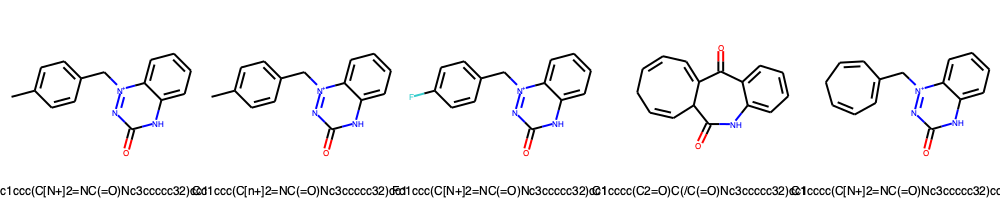

,smiles,distance,count,frequency,mol
0,Cc1ccc(C[N+]2=NC(=O)Nc3ccccc32)cc1,10.716868,12,0.666667,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,Cc1ccc(C[n+]2=NC(=O)Nc3ccccc32)cc1,10.716868,3,0.166667,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,Fc1ccc(C[N+]2=NC(=O)Nc3ccccc32)cc1,14.072391,1,0.055556,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,C1cccc(C2=O)C(/C(=O)Nc3ccccc32)cc1,16.003908,1,0.055556,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,C1cccc(C[N+]2=NC(=O)Nc3ccccc32)cc1,16.264132,1,0.055556,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [4]:
noise=3.0
print('Случайные молекулы находящиеся в {:.2f} стандартных отклонениях от точки'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df

# Вторая формула

In [5]:
smiles = mu.canon_smiles('CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C')


smiles_to_hot = vae.smiles_to_hot(smiles,canonize_smiles=True)
z_1 = vae.encode(smiles_to_hot)
X_r= vae.decode(z_1)


print('{:20s} : {}'.format('Input',smiles))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))
print()

qed, SAS, logP  = vae.predict_prop_Z(z_1)[0]
print('Properties')
print('{:7s}:{}'.format('- qed',qed))
print('{:7s}:{}'.format('- SAS', SAS))
print('{:7s}:{}'.format('- logP', logP))

Input                : CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C
Reconstruction       : CN(C)cccc2c(c1)C(=O)C@H]C(=O)OC(C)(C)C
Z representation     : (1, 196) with norm 13.439

Properties
- qed  :0.8115883469581604
- SAS  :2.219855308532715
- logP :2.4382758140563965


Случайные молекулы находящиеся в 3.00 стандартных отклонениях от точки
Found 1 unique mols, out of 2
SMILES
 0    CN(C1cccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C
Name: smiles, dtype: object


RDKit ERROR: [23:44:31] SMILES Parse Error: syntax error while parsing: CN(C1cccc2c(c1)C(=O)C@2)C(=O)OC(C)(C)C
RDKit ERROR: [23:44:31] SMILES Parse Error: Failed parsing SMILES 'CN(C1cccc2c(c1)C(=O)C@2)C(=O)OC(C)(C)C' for input: 'CN(C1cccc2c(c1)C(=O)C@2)C(=O)OC(C)(C)C'


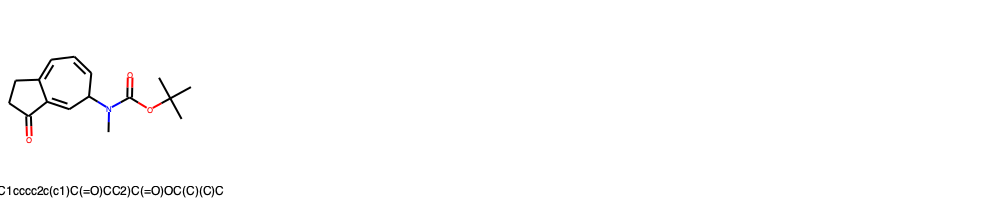

,smiles,distance,count,frequency,mol
0,CN(C1cccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C,18.253803,2,1.0,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [6]:
noise=3.0
print('Случайные молекулы находящиеся в {:.2f} стандартных отклонениях от точки'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df


# Третья формула

In [7]:
smiles = mu.canon_smiles('COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1')


smiles_to_hot = vae.smiles_to_hot(smiles,canonize_smiles=True)
z_1 = vae.encode(smiles_to_hot)
X_r= vae.decode(z_1)


print('{:20s} : {}'.format('Input',smiles))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))
print()

qed, SAS, logP  = vae.predict_prop_Z(z_1)[0]
print('Properties')
print('{:7s}:{}'.format('- qed',qed))
print('{:7s}:{}'.format('- SAS', SAS))
print('{:7s}:{}'.format('- logP', logP))

Input                : COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
Reconstruction       : COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NN)cn2)CC1
Z representation     : (1, 196) with norm 13.117

Properties
- qed  :0.7531525492668152
- SAS  :2.4784982204437256
- logP :0.0503462553024292


Случайные молекулы находящиеся в 3.00 стандартных отклонениях от точки
Found 7 unique mols, out of 63
SMILES
 0    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
1    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CS1
2    COC(=O)C1CCC(Nc2ccc(NC(=O)C(=O)NN)cn2)CC1
3     COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C1
4    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)nn2)CC1
5    COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NN)cn2)CC1
6    COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NC)cn2)CC1
Name: smiles, dtype: object


RDKit ERROR: [23:45:09] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [23:45:09] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [23:45:09] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [23:45:09] SMILES Parse Error: syntax error while parsing: COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NC)cn2)C@1
RDKit ERROR: [23:45:09] SMILES Parse Error: Failed parsing SMILES 'COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NC)cn2)C@1' for input: 'COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NC)cn2)C@1'
RDKit ERROR: [23:45:09] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
RDKit ERROR: 
RDKit ERROR: [23:45:09] SMILES Parse Error: syntax error while parsing: COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1
RDKit ERROR: [23:45:09] SMILES Parse Error: Failed parsing SMILES 'COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1' for input: 'COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C@1'
RDKit ERROR: [23:45:09] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12

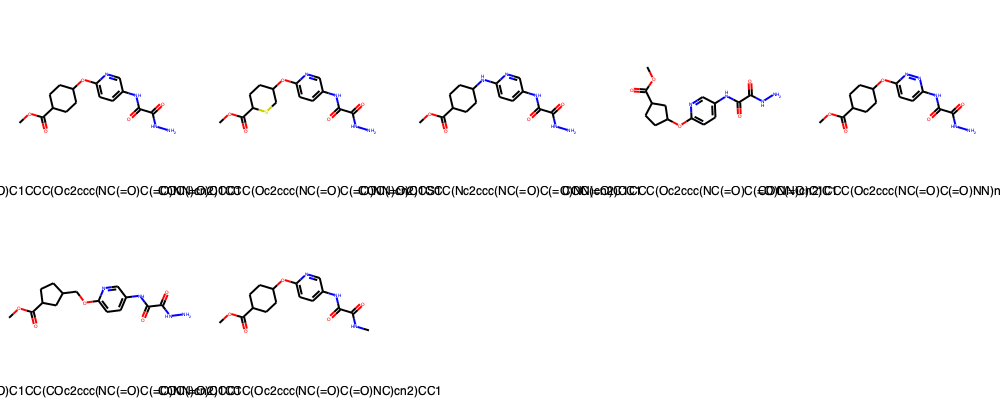

,smiles,distance,count,frequency,mol
0,COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1,0.000007,42,0.666667,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CS1,2.274277,1,0.015873,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,COC(=O)C1CCC(Nc2ccc(NC(=O)C(=O)NN)cn2)CC1,2.772543,1,0.015873,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C1,3.329379,1,0.015873,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)nn2)CC1,3.372217,2,0.031746,"<img data-content=""rdkit/molecule"" src=""data:i..."
5,COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NN)cn2)CC1,8.874703,5,0.079365,"<img data-content=""rdkit/molecule"" src=""data:i..."
6,COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NC)cn2)CC1,14.765283,11,0.174603,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [8]:
noise=3.0
print('Случайные молекулы находящиеся в {:.2f} стандартных отклонениях от точки'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df